In [ ]:
!cp "/content/drive/Shareddrives/Jonghan_Park_Projects/(3)condense-seq-3/data/H1_NCP_sp_1rep_deep_1kb_score_table.gtab.gz" '/content'

In [ ]:
!gzip -d "/content/H1_NCP_sp_1rep_deep_1kb_score_table.gtab.gz"

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/Shareddrives/Jonghan_Park_Projects/(3)condense-seq/data/H1_NCP_sp_1rep_deep_chr1_score_table.gtab', sep='\t')
df.head(3)

,Chromosome,Position,H1_NCP_sp_4_1rep_deep,H1_NCP_sp_8_1rep_deep,Sequence,ATcontent,CNumber(CHG),meCNumber(CHG),CNumber(CHH),meCNumber(CHH),...,H3K4me3,H3K56ac,H3K79me1,H3K79me2,H3K9ac,H3K9me3,H4K20me1,H4K5ac,H4K8ac,H4K91ac
0,chr1,10144,1.48052,2.00553,CTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAA...,0.50292,0,0.0,56,0.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,367.5399,0.0
1,chr1,10277,1.56351,1.97544,AACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCCTAAC...,0.46199,0,0.0,30,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,725.6557,0.0
2,chr1,10446,1.56187,1.92687,CTAACCCTAACCCTAACCCTAACCCTAACCCCTAACCCCTAACCCT...,0.40936,17,0.0,70,0.50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.0


In [ ]:
nmf = pd.read_csv('/content/drive/Shareddrives/Jonghan_Park_Projects/(3)condense-seq-3/data/H1_NCP_sp_NMF_NCPClass.txt', sep='\t')
nmf.head(1)

,ID,Class#
0,"('chr1', 99415507)",1


In [ ]:
f = open('/content/drive/Shareddrives/Jonghan_Park_Projects/(3)condense-seq-3/data/H1_12_segments.bed')
lines = f.readlines()
f.close()
lines = [i.strip().split('\t') for i in lines]
lines_ = []
for l in lines:
    if(l[0]=='chr1'): lines_.append(l)
print(len(lines_))

hmm = []
idx = 0
from tqdm import tqdm
for i in tqdm(range(len(df))):
    if(df['Chromosome'][i] != 'chr1'): continue
    while(df['Position'][i] > int(lines_[idx][2])): idx += 1
    if(df['Position'][i] >= int(lines_[idx][1]) and df['Position'][i] <= int(lines_[idx][2])):
        hmm.append(lines_[idx][3])
print(len(df[df['Chromosome']=='chr1']), len(hmm))

51824


100%|██████████| 1521325/1521325 [00:48<00:00, 31616.64it/s]


1521325 1521325


In [ ]:
chr = list(nmf['ID'])
chr = [i.split('\'')[1] for i in chr]

pos = list(nmf['ID'])
pos = [int(i[9:-1]) for i in pos]

temp = [(pos[i], nmf['Class#'][i]) for i in range(len(nmf))]
temp = sorted(temp)
print(len(temp))
print(temp[:3])
print(len(df[df['Chromosome']=='chr1']))

1521325
[(10144, 8), (10277, 8), (10446, 3)]
1521325


In [ ]:
ptm = pd.read_csv('/content/drive/Shareddrives/Jonghan_Park_Projects/(3)condense-seq-3/data/Data set3 (PTM library score data)/PTMlib_sp_score.txt', sep='\t')
ptm.head(3)

,ID,score (rep-1),score (rep-2),score (rep-3),Mean,Std
0,1,3.055531,3.012366,3.051474,3.039790,0.019463
1,2,3.153770,3.068002,3.102320,3.108031,0.035247
2,3,3.040830,3.039092,3.039047,3.039656,0.000830


In [ ]:
import numpy as np
from tqdm import tqdm
x, y, c, e = [], [], [], []
for i in tqdm(range(len(df))):
    if(sum(df.loc[i, 'H2AFZ':])==0): continue
    x.append(df.loc[i, 'H2AFZ':])
    y.append(df['H1_NCP_sp_8_1rep_deep'][i])
    c.append(temp[i][1])
    e.append(int(hmm[i][1:]))
x = np.array(x)
y = np.array(y)
c = np.array(c)
e = np.array(e)

100%|██████████| 1521325/1521325 [06:41<00:00, 3789.80it/s]


In [ ]:
import numpy as np
matrixidx = [[91, 92],
             [86],
             [83],
             [76],
             [77],
             [79],
             [74],
             [37],
             [38, 41],
             [39],
             [],
             [40],
             [21, 22, 23 ,24 ,25, 26, 27, 28, 33],
             [59],
             [66],
             [102],
             [103],
             [7,8,9,10,11,12,13,30,61],
             [69],
             [],
             [],
             [36],
             [14,15,16,17,18,19,20,31],
             [],
             [1,8,15,22],
             [2,9,16,23],
             [50]] # total 27
# print(len(matrixidx))

matrixweight = []
for i in range(len(matrixidx)):
    if(len(matrixidx[i])==0): matrixweight.append(ptm['Mean'].mean())
    else:
        _ = []
        for j in range(len(matrixidx[i])): _.append(ptm['Mean'][matrixidx[i][j]-1])
        matrixweight.append(np.mean(_))
print(len(matrixweight), matrixweight[:3])

27 [1.064558412380499, 4.1099840410183415, 4.999255963094753]


PearsonRResult(statistic=0.4492245613039807, pvalue=0.0)


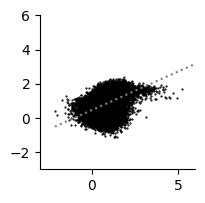

In [ ]:
x2, y2, c2, e2 = [], [], [], []
for i in range(len(x)):
    if(sum(x[i]!=0) <= 5): continue
    x2.append(x[i]/sum(x[i]))
    y2.append(y[i])
    c2.append(c[i])
    e2.append(e[i])
x2 = np.array(x2)
y2 = np.array(y2)
c2 = np.array(c2)
e2 = np.array(e2)

inner = np.inner(x2, matrixweight)
inner /= inner.std()/y2.std()
inner -= inner.mean()-y2.mean()
import scipy
print(scipy.stats.pearsonr(y2, inner))

import matplotlib.pyplot as plt
plt.figure(figsize=(2, 2))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.scatter(y2, inner, c='k', s=0.3)

_ = plt.xlim(-3, 6)
_ = plt.ylim(-3, 6)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(y2.reshape(-1, 1), inner)
X_new = np.array([[y2.min()], [y2.max()]])
y_predict = lin_reg.predict(X_new)
plt.plot(X_new, y_predict, color="gray", linestyle=':')

plt.savefig('./fig.png', format='png', dpi=1200, transparent=True)

# chromHMM

PearsonRResult(statistic=0.8105555312804861, pvalue=0.0013847575347039319)


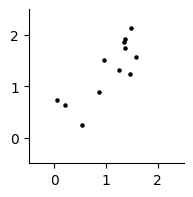

In [ ]:
a, b = [], []
for i in range(1, 13):
    itemp, ytemp = y2[np.where(e2==i)], inner[np.where(e2==i)]
    # print(i, y2[np.where(e2==i)].mean())
    # print(i, inner[np.where(e2==i)].mean())
    a.append(ytemp.mean())
    b.append(itemp.mean())
print(scipy.stats.pearsonr(a, b))

plt.figure(figsize=(2, 2))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.scatter(a, b, c='k', s=5)

_ = plt.xlim(-0.5, 2.5)
_ = plt.ylim(-0.5, 2.5)

plt.savefig('./fig_corr.svg', dpi=1200, transparent=True, format='svg')

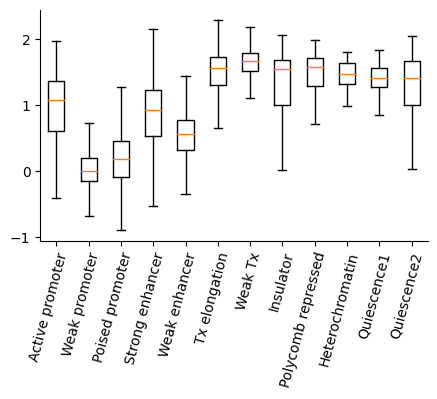

In [ ]:
label = ['Active promoter', 'Weak promoter', 'Poised promoter', 'Strong enhancer',
         'Weak enhancer', 'Tx elongation', 'Weak Tx', 'Insulator',
         'Polycomb repressed', 'Heterochromatin', 'Quiescence1', 'Quiescence2']

plt.figure(figsize=(5, 3))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
_ = plt.boxplot([inner[np.where(e2==i)] for i in range(1, 13)], showfliers=False)
_ = plt.xticks(range(1, 13), label, rotation=75, ha='right', rotation_mode="anchor")
_ = plt.yticks([-1, 0, 1, 2])

plt.savefig('./fig_chromhmm.svg', dpi=1200, transparent=True, format='svg')